## Dummy Classifier

#### Qa  Load and display the MNIST data


X shape: (70000, 784)
y shape: (70000,)
First few labels: ['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


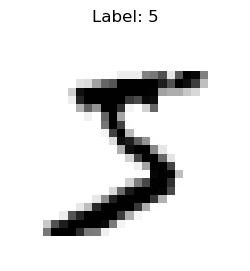

In [4]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

def MNIST_GetDataSet():
    """Load MNIST dataset from openml"""
    X, y = fetch_openml('mnist_784', return_X_y=True, cache=True)
    return X, y

# Load the data
X, y = MNIST_GetDataSet()

# Convert to numpy arrays
X = X.values
y = y.values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"First few labels: {y[:10]}")

# Plot the first digit
plt.figure(figsize=(3, 3))
MNIST_PlotDigit(X[0])
plt.title(f"Label: {y[0]}")
plt.show()

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

X.shape=(70000, 784)
X.shape=(70000, 784)
Training on 60000 samples
Testing on 10000 samples
Accuracy: 0.966
Correct predictions: 9658
Incorrect predictions: 342


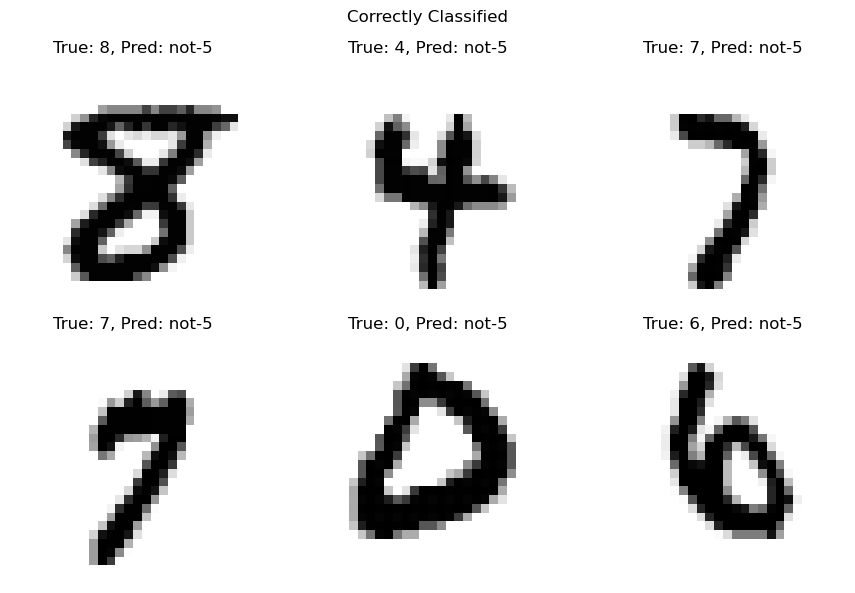

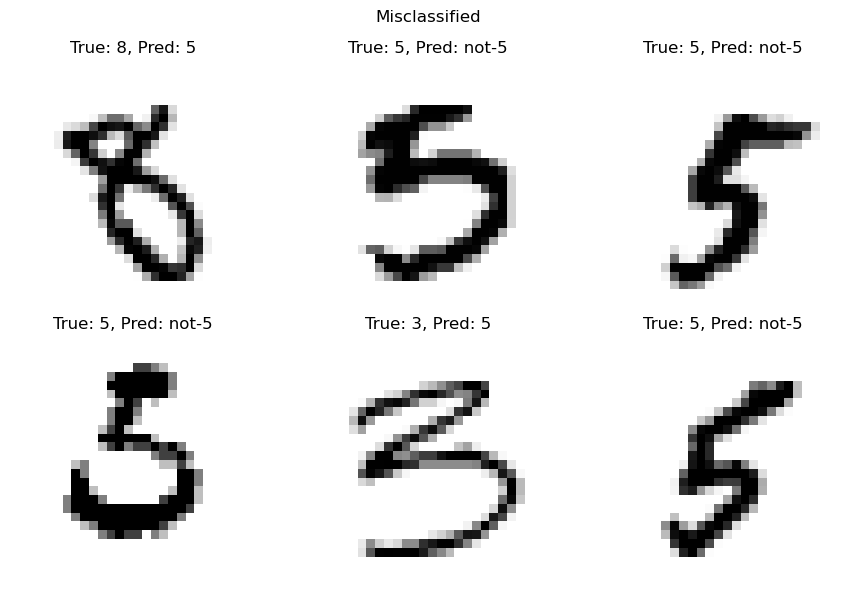

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Load and prepare data
X, y = MNIST_GetDataSet()
X = X.values
y = y.values

# Check if reshaping needed (our data is already 2D)
print(f"X.shape={X.shape}")
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}")

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Create binary labels (5 vs not-5)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

print(f"Training on {len(X_train)} samples")
print(f"Testing on {len(X_test)} samples")

# Create and train SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Make predictions
y_pred = sgd_clf.predict(X_test)

# Check accuracy
accuracy = (y_pred == y_test_5).mean()
print(f"Accuracy: {accuracy:.3f}")

# Find correct and incorrect predictions
correct_mask = (y_pred == y_test_5)
incorrect_mask = ~correct_mask

correct_indices = np.where(correct_mask)[0]
incorrect_indices = np.where(incorrect_mask)[0]

print(f"Correct predictions: {correct_mask.sum()}")
print(f"Incorrect predictions: {incorrect_mask.sum()}")

# Plot some correctly classified examples
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
fig.suptitle("Correctly Classified")

for i in range(6):
    idx = correct_indices[i]
    ax = axes[i//3, i%3]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='binary')
    ax.set_title(f"True: {y_test[idx]}, Pred: {'5' if y_pred[idx] else 'not-5'}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Plot some misclassified examples
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
fig.suptitle("Misclassified")

for i in range(6):
    idx = incorrect_indices[i]
    ax = axes[i//3, i%3]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='binary')
    ax.set_title(f"True: {y_test[idx]}, Pred: {'5' if y_pred[idx] else 'not-5'}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Why used:
```Python
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
```
Explanation: Creates boolean arrays where True = digit is 5, False = not 5. This converts multi-class problem (10 digits) into binary classification (5 vs not-5).

#### Qc Implement a dummy binary classifier

In [7]:
from sklearn.metrics import accuracy_score

class DummyClassifier:
    """A dummy classifier that always predicts 'not 5' (False)"""
    
    def fit(self, X, y):
        """Fit method - doesn't actually learn anything"""
        return self
    
    def predict(self, X):
        """Always predict False (not a 5)"""
        return [False] * len(X)

# Create and test dummy classifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

# Make predictions
dummy_pred = dummy_clf.predict(X_test)

# Calculate accuracy
dummy_accuracy = accuracy_score(y_test_5, dummy_pred)
print(f"Dummy classifier accuracy: {dummy_accuracy:.3f}")

# Compare with SGD
print(f"SGD classifier accuracy: {accuracy:.3f}")
print(f"Improvement from SGD: {accuracy - dummy_accuracy:.3f}")

# Show why dummy works so well
num_5s = sum(y_test_5)
num_not5s = len(y_test_5) - num_5s
print(f"\nIn test set:")
print(f"Number of 5s: {num_5s}")
print(f"Number of not-5s: {num_not5s}")
print(f"Percentage of not-5s: {num_not5s/len(y_test_5):.1%}")
print("\nDummy just guesses 'not-5' for everything and gets most right!")

Dummy classifier accuracy: 0.906
SGD classifier accuracy: 0.966
Improvement from SGD: 0.059

In test set:
Number of 5s: 937
Number of not-5s: 9063
Percentage of not-5s: 90.6%

Dummy just guesses 'not-5' for everything and gets most right!


### Qd Conclusion

These exercises demonstrated the core workflow of machine learning classification. We loaded real data (MNIST), converted a multi-class problem into binary classification, and compared different approaches.

The SGD classifier showed how gradient descent algorithms learn patterns from data to make predictions. It achieved 96.6% accuracy by finding decision boundaries that separate 5s from other digits based on pixel patterns.

The dummy classifier revealed an important lesson about baseline comparisons. By always predicting "not-5", it gets around 90% accuracy simply because 90% of digits aren't 5s. This shows why we need proper baselines - a 90% accuracy sounds impressive until you realize a brain-dead classifier can achieve it.

The class implementation using duck typing showed how Python's flexibility lets us create sklearn-compatible estimators without inheritance. As long as our class has fit() and predict() methods, it "walks and quacks" like a classifier.
